# Analysis of AirBnb data from Munich

This project aims to get a better understanding of the AirBnB market in Munich.
Therefore I'll try to find answers to the following four questions:

1. Which time is the most expensive to travel to Munich?

2. Is booking earlier cheaper than booking short time in advance and how do prices change over time?

3. Is it possible to build a model to automatically suggest a price to new hosts starting with AirBnb?

4. Which factors influence the prices most and how do they influence them?



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os


module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\src")

from preprocessing import *
from feature_engineering import *

In [2]:
calendar = pd.read_csv("../data/raw/munich/2020-05-24/calendar.csv.gz",compression="gzip")
listings = pd.read_csv("../data/raw/munich/2020-05-24/listings.csv.gz",compression="gzip")
reviews = pd.read_csv("../data/raw/munich/2020-05-24/reviews.csv.gz",compression="gzip")


In [3]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,36720,12723661,2014-05-09,11840468,Mikhail,I would like to thank Gabriella as her apartme...
1,36720,13147830,2014-05-20,5466213,Kim,Gabriela's place was absolutely fantastic. It...
2,36720,16302574,2014-07-25,2062882,Juan R.,"Quiet place, open to a courtyard, with all the..."
3,36720,16428874,2014-07-27,1225618,David,The best Airbnb expeierence I've had. The apar...
4,36720,19478358,2014-09-13,13977301,Cal,"All first rate ! Beautiful apartment, comforta..."


In [4]:
def calc_missing_data(df: pd.DataFrame, plot=False) -> pd.DataFrame:
    """
    Calculates number of missing values.
    Input:
    df - pd.DataFrame containing the data
    plot - default: False, change to True to plot a bar chart

    Return:
    pd.DataFrame with missing data per column
    """
    missing = df.isna().sum().rename("missing_total").to_frame()
    missing["ratio"] = missing / len(df)
    if plot:
        plt.figure(figsize=(12,6))
        plt.title("Missing values in %")
        missing.loc[missing["ratio"]>0, "ratio"].sort_values().plot.bar()
        plt.show()
    return missing


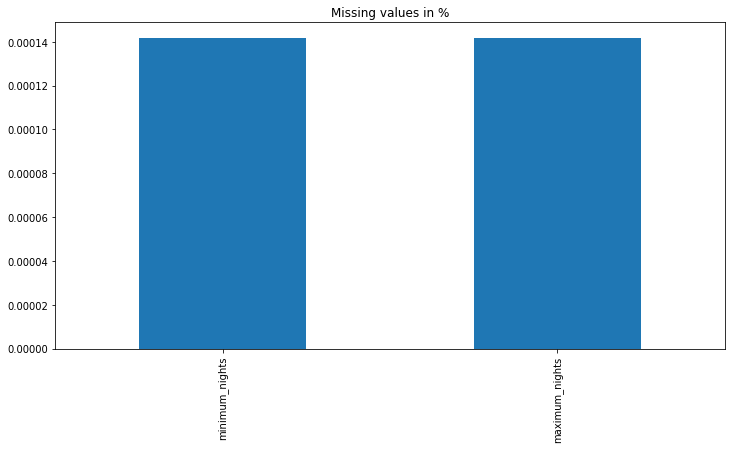

,missing_total,ratio
listing_id,0,0.000000
date,0,0.000000
available,0,0.000000
price,0,0.000000
adjusted_price,0,0.000000
minimum_nights,576,0.000142
maximum_nights,576,0.000142


In [5]:
calc_missing_data(calendar, True)

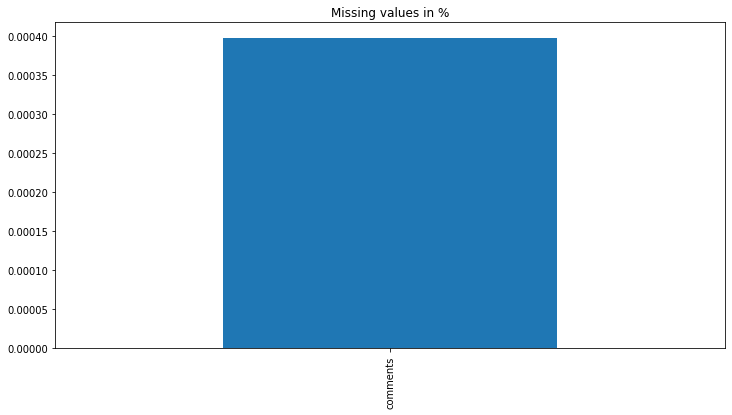

,missing_total,ratio
listing_id,0,0.000000
id,0,0.000000
date,0,0.000000
reviewer_id,0,0.000000
reviewer_name,0,0.000000
comments,68,0.000398


In [6]:
calc_missing_data(reviews, True)

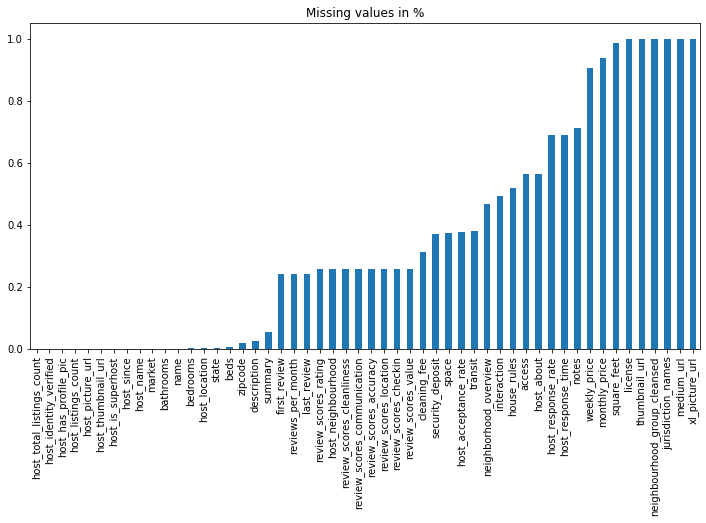

,missing_total,ratio
id,0,0.000000
listing_url,0,0.000000
scrape_id,0,0.000000
last_scraped,0,0.000000
name,20,0.001797
...,...,...
calculated_host_listings_count,0,0.000000
calculated_host_listings_count_entire_homes,0,0.000000
calculated_host_listings_count_private_rooms,0,0.000000
calculated_host_listings_count_shared_rooms,0,0.000000


In [7]:
calc_missing_data(listings, True)

In [8]:
calendar.loc[calendar["listing_id"]==36720, "price"].value_counts()

$95.00    365
Name: price, dtype: int64

In [9]:
calendar.groupby("listing_id")["price"].nunique()

listing_id
36720       1
49309       1
97945       2
114695      3
127383      1
           ..
43530556    6
43530747    5
43532497    1
43533356    8
43535486    1
Name: price, Length: 11128, dtype: int64

In [10]:
calendar.date.min()

'2020-05-25'

In [11]:
calendar["price"] = calendar["price"].str.replace("\\$|\\,","", regex=True)
calendar["price"] = calendar["price"].astype(np.float16)

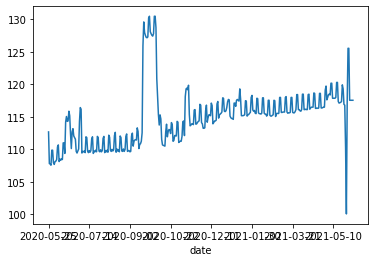

In [12]:
calendar.groupby("date")["price"].mean().plot()

In [68]:
calendar2 = pd.read_csv(""../data/raw/munich/"2020-04-25/calendar.csv.gz",compression="gzip")


In [72]:
calendar2["price"] = calendar2["price"].str.replace("\\$|\\,","", regex=True)
calendar2["price"] = calendar2["price"].astype(np.float16)

In [85]:
set1 = set(calendar.date)
set2 = set(calendar2.date)

In [87]:
calendar2.shape

(4062815, 7)

In [98]:
merged =calendar.merge(calendar2, on=["listing_id", "date"])

In [102]:
merged[(merged["price_x"] != merged["price_y"])]

,listing_id,date,available_x,price_x,adjusted_price_x,minimum_nights_x,maximum_nights_x,available_y,price_y,adjusted_price_y,minimum_nights_y,maximum_nights_y
1205,172672,2020-08-01,f,56.0,$56.00,1.0,4.0,f,58.0,$58.00,1,4
1206,172672,2020-08-02,f,56.0,$56.00,1.0,4.0,f,58.0,$58.00,1,4
1207,172672,2020-08-03,f,56.0,$56.00,1.0,4.0,f,58.0,$58.00,1,4
1208,172672,2020-08-04,f,56.0,$56.00,1.0,4.0,f,58.0,$58.00,1,4
1209,172672,2020-08-05,f,56.0,$56.00,1.0,4.0,f,58.0,$58.00,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3640124,43148613,2021-04-20,f,18.0,$18.00,3.0,1125.0,f,27.0,$27.00,3,1125
3640125,43148613,2021-04-21,f,18.0,$18.00,3.0,1125.0,f,27.0,$27.00,3,1125
3640126,43148613,2021-04-22,f,18.0,$18.00,3.0,1125.0,f,27.0,$27.00,3,1125
3640127,43148613,2021-04-23,f,18.0,$18.00,3.0,1125.0,f,27.0,$27.00,3,1125


In [16]:
scrape_dates = os.listdir("../data/raw/munich/")

In [17]:
calendar = pd.DataFrame(columns=["listing_id","date"])
for date in scrape_dates:
    path = "".join(["../data/raw/munich/", date, "/calendar.csv.gz"])
    print(path)
    c = pd.read_csv(path, compression="gzip")
    c = c.drop(columns=["adjusted_price","minimum_nights","maximum_nights"])
    c["price"] = format_price(c["price"])
    calendar = calendar.merge(c, on=["listing_id", "date"], how="outer", suffixes=("","_"+date))



../data/raw/munich/2019-03-15/calendar.csv.gz
../data/raw/munich/2019-05-22/calendar.csv.gz
../data/raw/munich/2019-06-24/calendar.csv.gz
../data/raw/munich/2019-07-16/calendar.csv.gz
../data/raw/munich/2019-08-24/calendar.csv.gz
../data/raw/munich/2019-09-24/calendar.csv.gz
../data/raw/munich/2019-10-20/calendar.csv.gz
../data/raw/munich/2019-11-25/calendar.csv.gz
../data/raw/munich/2019-12-26/calendar.csv.gz
../data/raw/munich/2020-01-22/calendar.csv.gz
../data/raw/munich/2020-02-27/calendar.csv.gz
../data/raw/munich/2020-03-19/calendar.csv.gz
../data/raw/munich/2020-04-25/calendar.csv.gz
../data/raw/munich/2020-05-24/calendar.csv.gz
../data/raw/munich/2020-06-20/calendar.csv.gz


In [40]:
calendar.shape

(10968366, 30)

In [23]:
import os
if not os.path.exists("../data/processed"):
    os.mkdir("../data/processed/")
calendar.to_pickle("../data/processed/calendar_merged.pkl")

In [24]:
calendar.listing_id.nunique()

17496

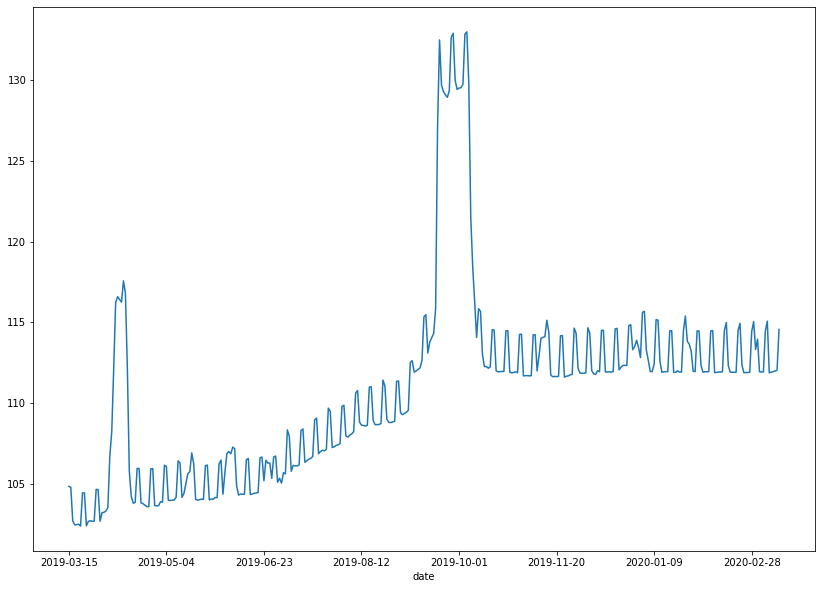

In [25]:
calendar[calendar["price"].notna()].groupby("date")["price"].mean().plot(figsize=(14,10))

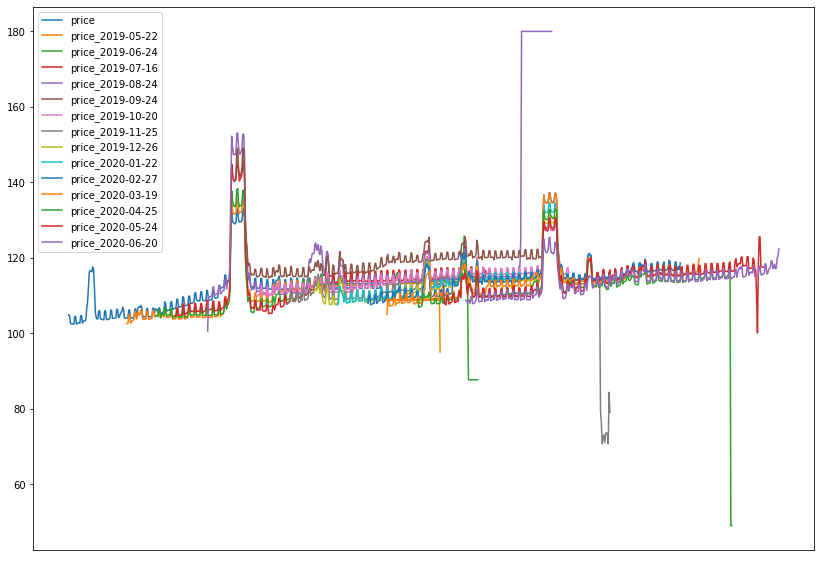

In [27]:

fig, ax = plt.subplots(figsize=(14,10))
for col in calendar.columns[calendar.columns.str.contains("price")]:
    ax.plot(calendar.loc[calendar[col].notna(),"date"].unique(),calendar[calendar[col].notna()].groupby("date")[col].mean(), label=col)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
monthFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(monthFmt)
ax.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(14,10))
for col in calendar.columns[calendar.columns.str.contains("price")]:
    ax.plot(calendar.loc[calendar[col].notna(),"date"].unique(),calendar[calendar[col].notna()].groupby("date")[col].mean(), label=col)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_minor_locator(mdates.DayLocator())
monthFmt = mdates.DateFormatter('%b')
ax.xaxis.set_major_formatter(monthFmt)
ax.legend()
plt.show()

In [29]:
calendar.unstack

,listing_id,date,available,price,available_2019-05-22,price_2019-05-22,available_2019-06-24,price_2019-06-24,available_2019-07-16,price_2019-07-16,...,available_2020-02-27,price_2020-02-27,available_2020-03-19,price_2020-03-19,available_2020-04-25,price_2020-04-25,available_2020-05-24,price_2020-05-24,available_2020-06-20,price_2020-06-20
0,8296281,2019-03-15,f,99.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8296281,2019-03-16,f,99.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8296281,2019-03-17,f,99.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8296281,2019-03-18,f,99.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8296281,2019-03-19,f,99.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
for col in calendar.columns[calendar.columns.str.contains("price")]:
    print(calendar.groupby("date")[col].apply(lambda x: x.mean(skipna=True)).dropna().head())

date
2019-03-15    104.816177
2019-03-16    104.775169
2019-03-17    102.680977
2019-03-18    102.436661
2019-03-19    102.449043
Name: price, dtype: float64
date
2019-05-22    102.548889
2019-05-23    102.553787
2019-05-24    104.704178
2019-05-25    104.924400
2019-05-26    102.717842
Name: price_2019-05-22, dtype: float64
date
2019-06-24    104.599663
2019-06-25    104.617264
2019-06-26    104.622734
2019-06-27    104.439827
2019-06-28    106.231552
Name: price_2019-06-24, dtype: float64
date
2019-07-16    104.638016
2019-07-17    104.519043
2019-07-18    104.526764
2019-07-19    106.615356
2019-07-20    106.729538
Name: price_2019-07-16, dtype: float64
date
2019-08-24    100.552124
2019-08-25    109.666420
2019-08-26    109.607391
2019-08-27    109.739754
2019-08-28    109.809151
Name: price_2019-08-24, dtype: float64
date
2019-09-24    140.209518
2019-09-25    140.665863
2019-09-26    141.978226
2019-09-27    148.097198
2019-09-28    148.982193
Name: price_2019-09-24, dtype: float

In [41]:
mean_prices = calendar.groupby("date")[calendar.columns[calendar.columns.str.contains("price")]].mean()

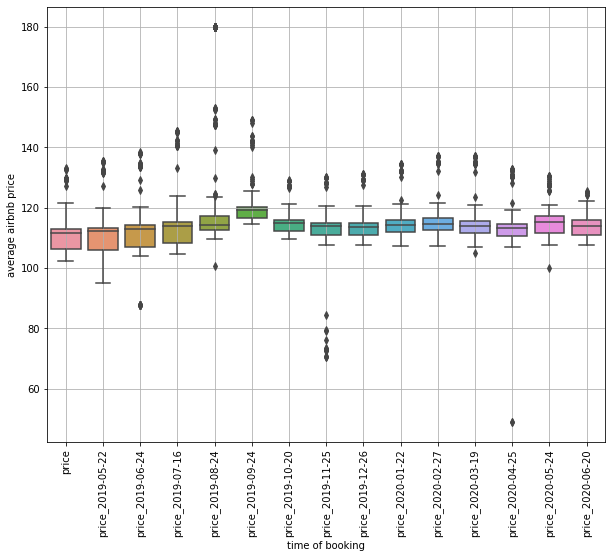

In [93]:
plt.figure(figsize=(10,8))
sns.boxplot(x="variable", y="value", data=pd.melt(mean_prices))
plt.xticks(rotation=90)
plt.xlabel("time of booking")
plt.ylabel("average airbnb price")
plt.grid(True)

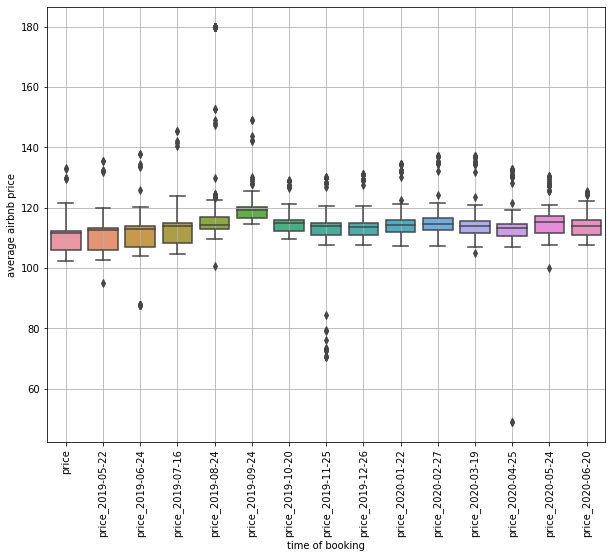

In [94]:
# price information about bookings for dates between 09-01 and 10-01 are excluded, the average prices are still higher when booking during august/september
plt.figure(figsize=(10,8))
sns.boxplot(x="variable", y="value", data=pd.melt(mean_prices[~((mean_prices.index >= "2019-09-01") & (mean_prices.index <= "2019-10-01"))]
))
plt.xticks(rotation=90)
plt.xlabel("time of booking")
plt.ylabel("average airbnb price")
plt.grid(True)

In [48]:
plt.figure(figsize=(10,10))
sns.boxplot(x="variable", y="value", data=pd.melt(mean_prices))
plt.xticks(rotation=90)
plt.xlabel("time of booking")
plt.ylabel("average airbnb price")
plt.grid(True)

,variable,value
0,price,104.816177
1,price,104.775169
2,price,102.680977
3,price,102.436661
4,price,102.449043
...,...,...
12430,price_2020-06-20,117.079124
12431,price_2020-06-20,117.341393
12432,price_2020-06-20,119.931885
12433,price_2020-06-20,120.503578
